In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sheets = pd.read_excel('Data/Global fitting.xlsx', sheet_name=None)
groupped = {
    k: v.groupby('Photon (eV)').mean()
    for k, v in sheets.items() if k in {'summary', 'TDHF', 'TDCASSCF'}
}

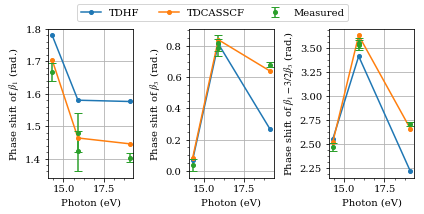

In [3]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6,3))
plt.subplot(131)
plt.xlabel('Photon (eV)')
plt.ylabel(r'Phase shift of $\beta_1$ (rad.)')
plt.plot(groupped['TDHF']['beta1 shift'], 'o-', label='TDHF')
plt.plot(groupped['TDCASSCF']['beta1 shift'], 'o-', label='TDCASSCF')
plt.errorbar(sheets['measured']['Photon (eV)'],
             sheets['measured']['beta1 shift'],
             yerr=sheets['measured']['beta1 shift error'],
             fmt='o',
             label='Measured')
plt.grid(True)
plt.figlegend(loc='upper center', ncol=3)

plt.subplot(132)
plt.xlabel('Photon (eV)')
plt.ylabel(r'Phase shift of $\beta_3$ (rad.)')
plt.plot(groupped['TDHF']['beta3 shift'], 'o-', label='TDHF')
plt.plot(groupped['TDCASSCF']['beta3 shift'], 'o-', label='TDCASSCF')
plt.errorbar(sheets['measured']['Photon (eV)'],
             sheets['measured']['beta3 shift'],
             yerr=sheets['measured']['beta3 shift error'],
             fmt='o',
             label='Measured')
plt.grid(True)

plt.subplot(133)
plt.xlabel('Photon (eV)')
plt.ylabel(r'Phase shift of $\beta_1-3/2\beta_3$ (rad.)')
plt.plot(groupped['TDHF']['beta1m3 shift'], 'o-', label='TDHF')
plt.plot(groupped['TDCASSCF']['beta1m3 shift'], 'o-', label='TDCASSCF')
plt.errorbar(sheets['measured']['Photon (eV)'],
             sheets['measured']['beta1m3 shift'],
             yerr=sheets['measured']['beta1m3 shift error'],
             fmt='o',
             label='Measured')
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(top=0.875)
plt.savefig(f"Figures/compare_ne_shifts_with_ishikawa's1.pdf")
plt.show()

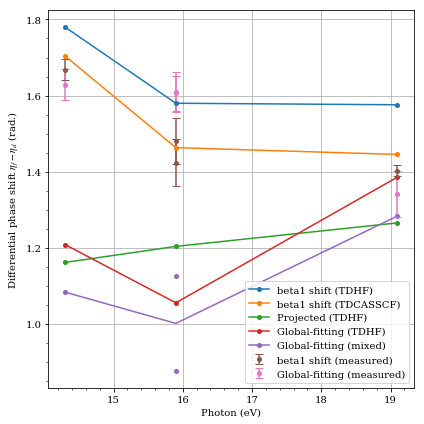

In [4]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6,6))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad.)')

for k in ['beta1 shift (TDHF)',
          'beta1 shift (TDCASSCF)',
          'Projected (TDHF)',
          'Global-fitting (TDHF)']:
    plt.plot(groupped['summary'][k], 'o-', label=k)

k = 'Global-fitting (mixed)'
l, = plt.plot([], 'o-', label=k)
prop = {k: v for k, v in l.properties().items() if k in {'color'}}
plt.plot(sheets['summary']['Photon (eV)'], sheets['summary'][k], 'o', label='', **prop)
plt.plot(groupped['summary'][k], '-', label='', **prop)

plt.errorbar(sheets['summary']['Photon (eV)'],
             sheets['summary']['beta1 shift (measured)'],
             yerr=sheets['summary']['beta1 shift error (measured)'],
             fmt='o',
             label='beta1 shift (measured)')
plt.errorbar(sheets['summary']['Photon (eV)'],
             sheets['summary']['Global-fitting (measured)'],
             yerr=sheets['summary']['Global-fitting error (measured)'],
             fmt='o',
             label='Global-fitting (measured)')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Figures/compare_ne_shifts_with_ishikawa's2.pdf")
plt.show()